<a href="https://colab.research.google.com/github/osmanbatuhansahin/MyDataScienceExercises/blob/main/orthopedic_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

#close warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#read data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/orthopedic_patients/orthopedic_patients.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


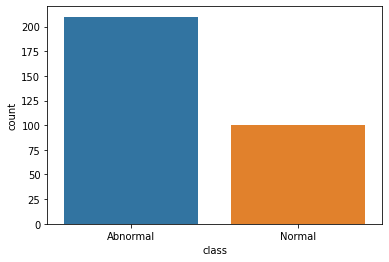

In [5]:
#Class countplot
sn.countplot(data["class"])
plt.show()

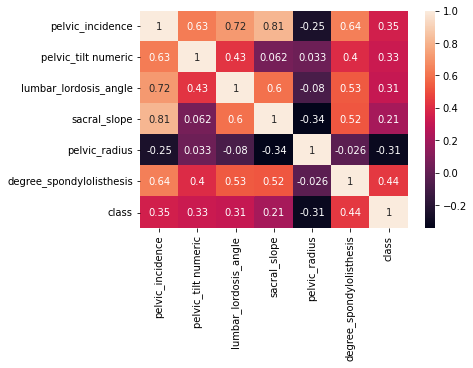

In [18]:
#correlation matrix
corr_mat = data.corr()
sn.heatmap(corr_mat, annot = True)

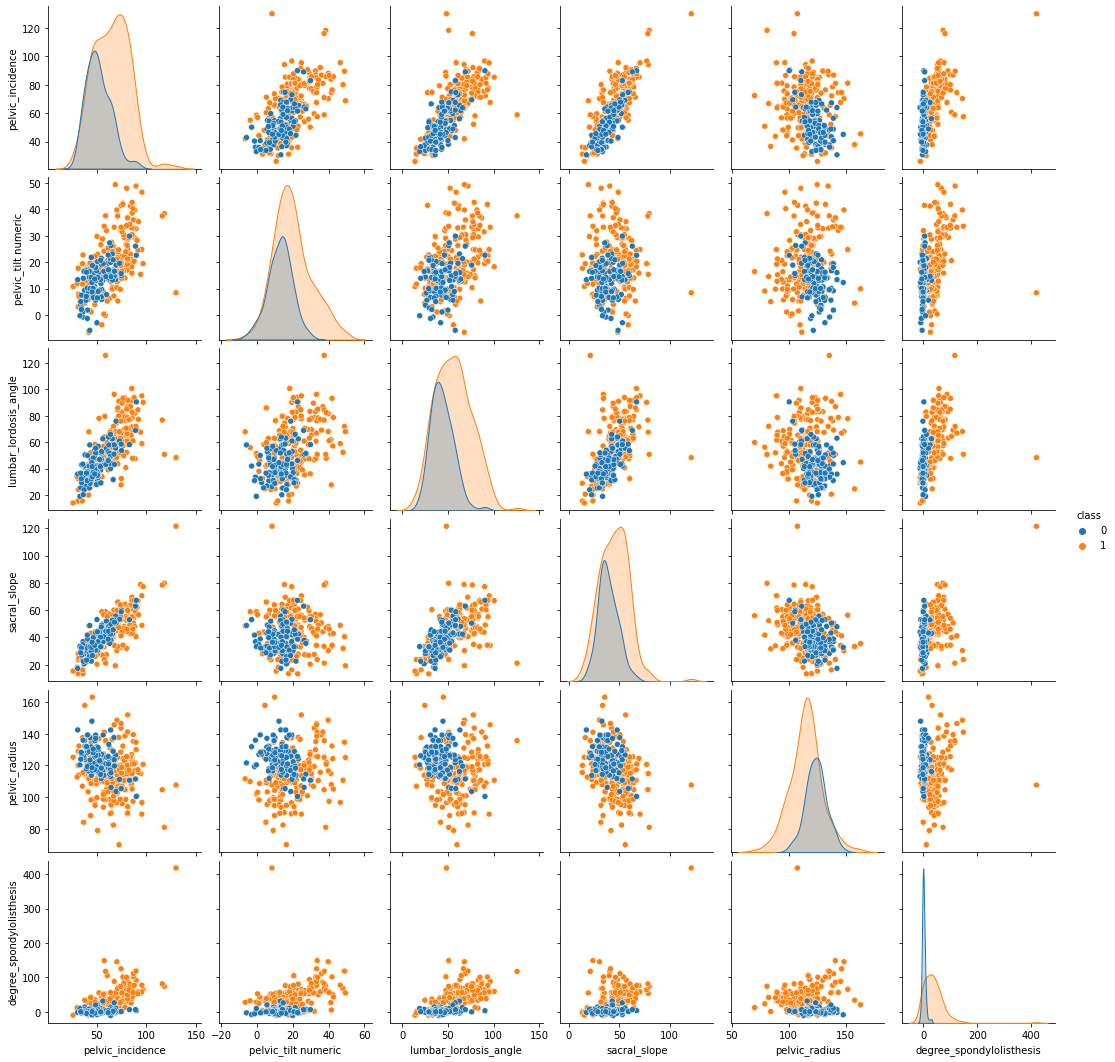

In [22]:
#pairplot
sn.pairplot(data,hue="class")
plt.show()

In [6]:
#make class col numeric
#Abnormal is 1 Normal is 0

data["class"] = data["class"].map({"Abnormal": 1, "Normal": 0})
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [7]:
#seperate target
y = data["class"]
X = data.drop(["class"],axis=1)

In [8]:
#z score normalization
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

X_standardized = pd.DataFrame(z_score(X),columns = X.columns)

X_standardized.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.146849,0.500559,-0.664103,-0.184652,-1.445310,-0.706916
1,-1.243853,-0.747560,-1.450655,-1.039839,-0.263958,-0.578621
2,0.483588,0.467177,-0.099102,0.272642,-0.896237,-0.794137
3,0.510564,0.710414,-0.410675,0.125925,-1.205354,-0.401639
4,-0.625636,-0.788418,-1.272687,-0.215527,-0.732271,-0.489315


In [9]:
#train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train,y_train)

print("Accuracy is:",lr.score(X_test,y_test))

Accuracy is: 0.8709677419354839


In [11]:
#knn
from sklearn.neighbors import KNeighborsClassifier

#best k value
klist = []
tenlist = list(range(1,11))
for i in range(1,11):
  knnV = KNeighborsClassifier(n_neighbors=i)
  knnV.fit(X_train,y_train)
  klist.append(knnV.score(X_test,y_test))

knn_dict = dict(zip(tenlist,klist))
for key, value in knn_dict.items():
  print(key, ' : ', value)
print("Max accuracy:",max(knn_dict,key=knn_dict.get))


1  :  0.7903225806451613
2  :  0.7741935483870968
3  :  0.7741935483870968
4  :  0.8225806451612904
5  :  0.8225806451612904
6  :  0.8387096774193549
7  :  0.7741935483870968
8  :  0.8064516129032258
9  :  0.7903225806451613
10  :  0.7741935483870968
Max accuracy: 6


In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print("Accuracy is:",knn.score(X_test,y_test))


Accuracy is: 0.8387096774193549


In [13]:
#SVM
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train,y_train)

print("Accuracy is:",svm.score(X_test,y_test))


Accuracy is: 0.8225806451612904


In [14]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Accuracy is:",dt.score(X_test,y_test))

Accuracy is: 0.8225806451612904


In [15]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50,random_state=1)
rf.fit(X_train,y_train)

print("Accuracy is:",rf.score(X_test,y_test))

Accuracy is: 0.8064516129032258
